In [2]:
%matplotlib inline

In [45]:
import os, sys, numpy as np, pandas as pd, scipy as sp
import scipy.signal as signal
import scipy.fftpack as fftpack
import matplotlib
import matplotlib.pyplot as plt

In [188]:
matplotlib.rcParams['figure.figsize'] = (12,4)

In [46]:
def haar(n, a):
    a = int(a)
    n = int(n)
    y = np.zeros(n, dtype=float)
    m = n // 2
    y[m - 2 * a:m] = 1
    y[m: m + 2 * a] = -1
    return y

def haaro(n, a):
    """Odd harr wavelet"""
    a = int(a)
    n = int(n)
    m = n // 2
    y = np.zeros(n, dtype=float)
    y[m - a:m + a] = 1
    y[m - 2 * a: m - a] = 0
    y[m + a: m + 2 * a] = 0
    return y

Denoising with rect pulse kernel transform

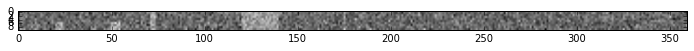

In [232]:
M = 360
z = np.zeros((10,M))
z[:,20:25] = 1
z[:,50:55] = 1
z[:,71:74] = 1
z[:,120:140] = 1
z[:,175:176] = 1
z[:6, :60] = 0
z += np.random.normal(0, 0.5, z.shape)
# z += 2*(np.random.random( z.shape) > 0.25)

np.clip(z, 0, 1)
plt.imshow(z, cmap='gray')

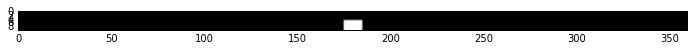

In [237]:
w = 5
kx = np.zeros(z.shape)
kx[:,M//2-w:M//2+w] = 1
kx[:5,:] = 0
plt.imshow(kx, cmap='gray')

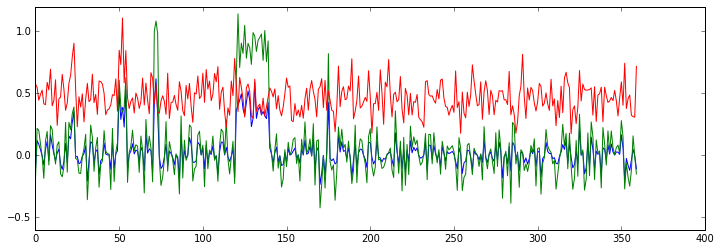

In [242]:
plt.plot(np.mean(z, axis=0)*np.std(z, axis=0))
plt.plot(np.mean(z, axis=0))
plt.plot(np.std(z, axis=0))

In [239]:
kf = fftpack.fft2(kx)
kz = fftpack.fft2(z)

(10, 360)


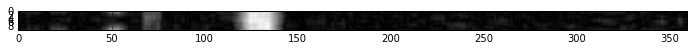

In [240]:
ift = fftpack.fftshift(fftpack.ifft2(kf*kz))
recov = np.abs(ift)
print(recov.shape)
plt.imshow(recov, cmap='gray')

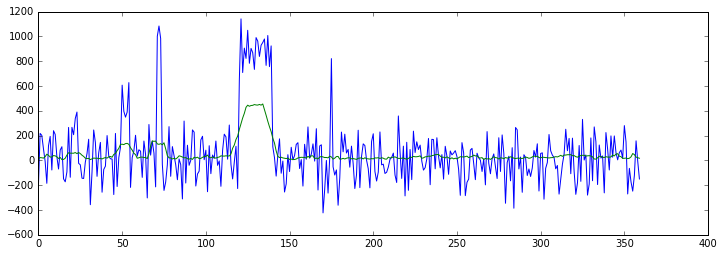

In [241]:
squash = np.sum(recov, axis=0)
plt.plot(np.sum(z, axis=0)*100)
plt.plot(squash)

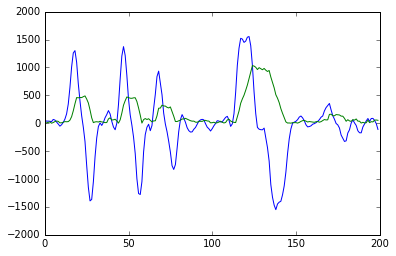

In [179]:
c = signal.cwt(squash, haar, [2])
plt.plot(c.T)
plt.plot(squash)

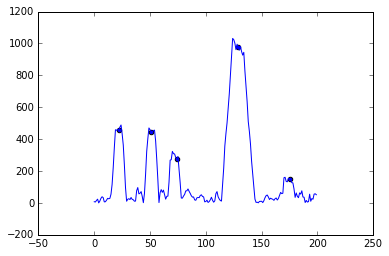

In [180]:
peaks = signal.find_peaks_cwt(squash, np.array([8.]))
plt.plot(squash)
plt.scatter(peaks, squash[peaks])

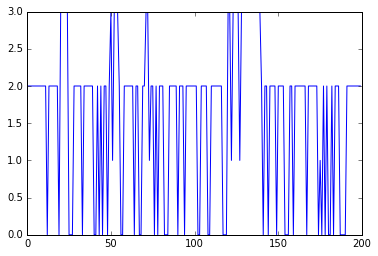

In [172]:
plt.plot(z[0,:].T)

(1, 200)


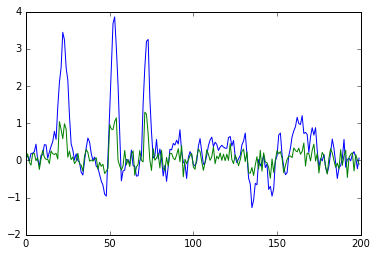

In [44]:
c = signal.cwt(z[0,:].T, haaro, [2])
print(c.shape)
plt.plot(c.T)
plt.plot(z[0,:])